## <center>Perceptron, Adaline, and Optimization</center>
#### <center>Shan-Hung Wu & DataLab</center>
#### <center>Fall 2023</center>

In [1]:
# inline plotting instead of popping out
%matplotlib inline

import os, math
from IPython.display import Image
import numpy as np
seed = np.random.seed

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# load utility classes/functions e.g., plot_decision_regions()
import urllib.request

urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/04-1_Perceptron_Adaline/lab04lib.py", "lab04lib.py")

from lab04lib import *

In this lab, we will guide you through the implementation of Perceptron and Adaline, two of the first algorithmically described machine learning algorithms for the classification problem. We will also discuss how to train these models using the optimization techniques, including the gradient descent (GD) and stochastic gradient descent (SGD), and compare their convergence speed.

## Data Preparation

We use the Iris dataset from the UCI machine learning repository, which is one of the best known datasets in classification. It consists of 150 iris plants as examples, each with the sepal and petal sizes as attributes and the type as class label. Let's download the Iris dataset using Pandas first:

In [3]:
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/'
    'machine-learning-databases/iris/iris.data',
    header = None
)
df.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class label']
display(df.head())

X = df[['Petal length', 'Petal width']].values
y = pd.factorize(df['Class label'])[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

print('# Training data points: {}'.format(X_train.shape[0]))
print('# Testing data points: {}'.format(X_test.shape[0]))
print('Class labels: {} (mapped from {}'.format(np.unique(y), np.unique(df['Class label'])))

,Sepal length,Sepal width,Petal length,Petal width,Class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Training data points: 100
# Testing data points: 50
Class labels: [0 1 2] (mapped from ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


`format` 是 Python 字串的一種格式化方法，用於將不同類型的資料插入到字串中的特定位置。它允許你將字串中的佔位符替換為變數的值，以創建格式化的字串。

在上面的程式碼中，`format` 用於將變數的值插入到字串中的佔位符位置。以下是一個示例：

```python
name = "Alice"
age = 30

# 使用 format 將變數插入字串中的佔位符
message = "我的名字是{}，我今年{}歲。".format(name, age)

# 印出格式化後的字串
print(message)
```

在上述示例中，`{}` 是佔位符，`format(name, age)` 將 `name` 和 `age` 變數的值插入到字串中的佔位符位置。最終的字串 `message` 將包含這些變數的值，形成一條格式化的訊息。

`format` 的好處是你可以在字串中指定佔位符的位置，並且可以處理不同類型的資料（字串、整數、浮點數等）。這種字串格式化方法在構建消息、日誌、報告等文字輸出時非常有用。在 Python 3.6 及更高版本中，還引入了更強大的 f-strings，用於更方便地進行字串插值。


## Standardization for Gradient Descent

Recall from the lecture that the gradient descent may perform poorly if the Hessian of the function $f$ to be minimized has a large condition number. In this case, the surface of $f$ can be curvy in some directions but flat in the others. Therefore, the gradient descent, which ignores the curvatures, may overshoot the optimal point along curvy directions but take too small step along flat ones.

One common way to improve the conditioning of $f$ is to <font color="red">standardize dataset $X$</font>, as follows:

In [4]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
# 只用training set 的平均值以及標準差來計算
X_test_std = sc.transform(X_test)

Note: the standardization should calculate the mean $μ$ and variance $σ^2$ using only the training set, as the testing set must be remain unknown during the entire training process.

## Training Perceptron via Scikit-learn

Having standardized the training data, we can now train a Perceptron model:

In [5]:
# max_iter : The maximum number of passes over the training data
# eta0 : learning rate
ppn = Perceptron(max_iter=10, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=10)

[Reference: Epoch, Batch size, Iteration, Learning Rate](https://medium.com/%E4%BA%BA%E5%B7%A5%E6%99%BA%E6%85%A7-%E5%80%92%E5%BA%95%E6%9C%89%E5%A4%9A%E6%99%BA%E6%85%A7/epoch-batch-size-iteration-learning-rate-b62bf6334c49)

Having trained a model in Scikit-learn, we can make predictions over the testing set and report the accuracy. Note that the testing set should be standardized in the exact same way as the training set.

In [6]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 5
Accuracy: 0.90


We get 90% accuracy. Now let's plot the decision boundaries to see how the model works:

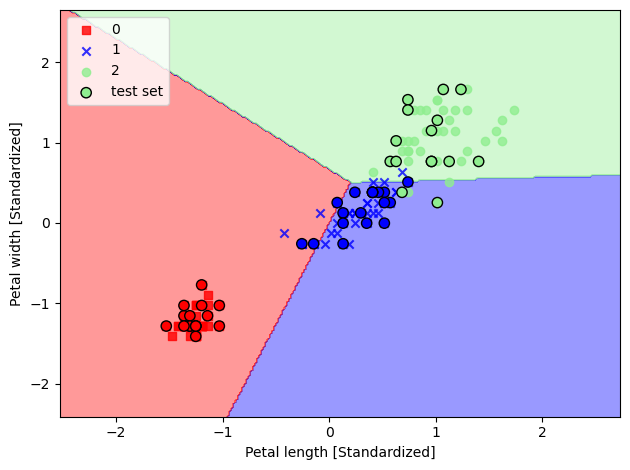

In [7]:
if not os.path.exists('./output'):
    os.makedirs('./output')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(len(y_train),
                                                      len(y_train) + len(y_test)))
plt.xlabel('Petal length [Standardized]')
plt.ylabel('Petal width [Standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig('./output/fig-perceptron-scikit.png', dpi=300)
plt.show()

這段程式碼執行以下操作：

1. 檢查是否存在名為 './output' 的目錄，如果不存在則建立該目錄。通常用於存儲輸出文件或圖形。

2. 垂直堆疊訓練集和測試集的特徵數據 `X_train_std` 和 `X_test_std`，以創建一個合併的特徵矩陣 `X_combined_std`。

3. 水平堆疊訓練集和測試集的類別標籤 `y_train` 和 `y_test`，以創建一個合併的類別標籤數組 `y_combined`。

4. 使用 `plot_decision_regions` 函數繪製感知機分類器 `ppn` 的決策區域，並在圖上標示訓練集和測試集的數據點。這有助於視覺化模型的分類能力。

5. 設定 x 軸和 y 軸的標籤，以說明圖中的特徵。

6. 在圖上添加圖例，顯示數據點的類別。

7. 最後，將圖形保存為 './output/fig-perceptron-scikit.png' 檔案，並在屏幕上顯示圖形。

總之，這段程式碼主要用於視覺化感知機分類器在經過標準化的特徵空間中的決策邊界，以及訓練和測試數據點在這個空間中的分佈。這有助於了解模型的性能和分類效果。

## Multiclass Classification

The Perceptron model is originally designed for the <font color="red">binary classification</font> problems. However, we can see from the above that the model implemented in the Scikit-learn is able to predict the labels of <font color="red">multiple classes (3 in this case)</font>. This is achieved by wrapping the binary model with an <font color="red">One-vs-All (or One-vs-Rest) procedure</font>. If there are $K$ classes, then this procedure <font color="red">trains $K$ binary classifiers</font> for each class, where each classifier treats only **one class as positive** and **the rests as negative**. To predict the label of a testing data point, each classifier generates the soft output $f(x)$ = $w^⊤x-b$ $∈R$  for every class, and then the class who gets the highest output value becomes the predicted label.

## Implementing Perceptron

Now it's time to implement a classifier by our own. For simplicity, we only implement the binary Perceptron model. This can be easily done as follows:

In [8]:
class Perceptron2(object):
    """Perceptron classifier.
    
    Parameters
    ------------
    eta: float 
        Learning rate (between 0.0 and 1.0)
    n_iter: int
        Number of epochs, i.e., passes over the training dataset.
        
    Attributes
    ------------
    w_: 1d-array
        Weights after fitting.
    errors_: list
        Number of misclassifications in every epoch.
    random_state : int
        The seed of the pseudo random number generator.
    """
    
    def __init__(self, eta=0.01, n_iter=10, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : array-like; shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like; shape = [n_samples]
            Target values, or labels.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0.0
            for xi, yi in zip(X, y):
                output = self.predict(xi)
                error = (yi - output)
                self.w_[1:] += self.eta * error * xi
                self.w_[0] += self.eta * error
                errors += int(error != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1) # sign function

#### 1. for xi, yi in zip(X, y):
`X = X_train, y = y_train`

#### 2. w = [-b, $w_1$, ..., $w_D$]

#### 3. bias的更新方法
`self.w_[0] += self.eta * error`

#### 4. weight的更新方法
`新權重 = 舊權重 + 學習率(eta) x 誤差(error) x 樣本特徵 (xi)`

```python
5. self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
```

- `self.w_`：`self.w_` 是感知機模型的權重向量，其中包含了每個特徵的權重值。這個權重向量用來線性組合輸入特徵，進行分類。

- `rgen = np.random.RandomState(self.random_state)`：這一行程式碼用來建立一個偽隨機數生成器（RandomState），以確保在不同的運行中有相同的隨機初始化。`self.random_state` 是在建立 `Perceptron2` 物件時傳遞的偽隨機數種子。

- `.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])`：這一部分用來產生權重向量的初始值。具體來說：
  - `loc` 是生成的值的平均數，這裡設為0.0，表示生成的值以0為平均數。
  - `scale` 是生成的值的標準差，這裡設為0.01，表示生成的值接近於0，但有一定的隨機性。
  - `size` 是生成的陣列大小，這裡是1 + X.shape[1]，表示生成一個長度為 X 特徵數量加1的陣列。特徵數量加1是因為感知機模型通常包括一個額外的偏差項（bias），它對應著權重向量中的第一個元素。

綜合來說，這行程式碼的目的是生成一個具有隨機初始值的權重向量，以便在感知機的訓練過程中逐漸調整這些權重，使模型能夠正確分類訓練數據。初始化權重是感知機訓練的第一步，而後續的訓練過程中會不斷更新這些權重，直到模型能夠正確分類訓練數據或達到預定的迭代次數。

6. 理解 `predict` 方法的關鍵在於它如何使用權重向量 `self.w_` 來進行分類預測。以下是 `predict` 方法的程式碼以及解釋：

```python
def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)
```

- `predict` 方法接受輸入特徵 `X`，並返回預測的類別標籤。

- `self.net_input(X)` 呼叫了 `net_input` 方法，這個方法用來計算感知機的輸入，即線性組合。`net_input` 方法的詳細解釋如下：

```python
def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.w_[1:]) + self.w_[0]
```

- `net_input` 方法接受輸入特徵 `X`，計算感知機的輸入，即線性組合。這個線性組合是輸入特徵 `X` 與權重向量 `self.w_` 的點積，再加上偏差項（`self.w_[0]`）。

- `np.where(self.net_input(X) >= 0.0, 1, -1)`：這是 `predict` 方法的核心部分。它使用感知機的輸入值來判斷樣本的類別，具體如下：
  - 如果感知機的輸入值大於等於0.0，就返回1，表示為正類別。
  - 如果感知機的輸入值小於0.0，就返回-1，表示為負類別。

因此，`predict` 方法的實質是對感知機的輸入進行閾值化，將輸入大於等於0.0的樣本分為正類別，小於0.0的樣本分為負類別。這符合感知機的基本工作原理，它使用輸入特徵的線性組合來進行分類決策。如果線性組合大於等於0.0，意味著樣本在決策邊界的一側，被分類為正類別；如果小於0.0，意味著樣本在決策邊界的另一側，被分類為負類別。

NOTE:

we could have implemented the shorthand version of $X$ and $w$ to include the bias term. However, we single out the addition of the bias term (self.w_[0]) for performance reason, as adding a vector of 1's to the training array each time we want to make a prediction would be inefficient.
some production implementation shuffles data in the beginning of each epoch. We omit this step for simplicity.

To train our binary Perceptron model using the Iris dataset, we recreate our training and testing sets so that they contain only binary labels:

In [9]:
# discard exmaples in the first class
X = X[50:150]
y = np.where(y[50:150] == 2, -1, y[50:150])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=1)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print('# Training data points: %d' % X_train.shape[0])
print('# Testing data points: %d' % X_test.shape[0])
print('Class labels: %s' % np.unique(y))

# Training data points: 90
# Testing data points: 10
Class labels: [-1  1]


Let's train our model:

Misclassified samples: 3
Accuracy: 0.70


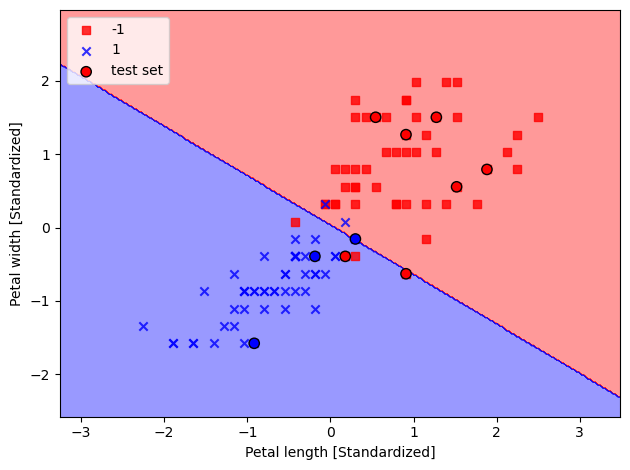

In [10]:
# training

ppn2 = Perceptron2(eta=0.1, n_iter=20)

ppn2.fit(X_train_std, y_train)

# testing

y_pred = ppn2.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot descision boundary

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, 
                      classifier=ppn2, test_idx=range(len(y_train),
                                                      len(y_train) + len(y_test)))
plt.xlabel('Petal length [Standardized]')
plt.ylabel('Petal width [Standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('./output/fig-perceptron2-boundary.png', dpi=300)
plt.show()

Our Perceptron model achieves 70% accuracy, which is not too good. This is mainly because the training algorithm does not converge when the data points are not linearly separable (by a hyperplane). We can track convergence using the errors_ attributes:

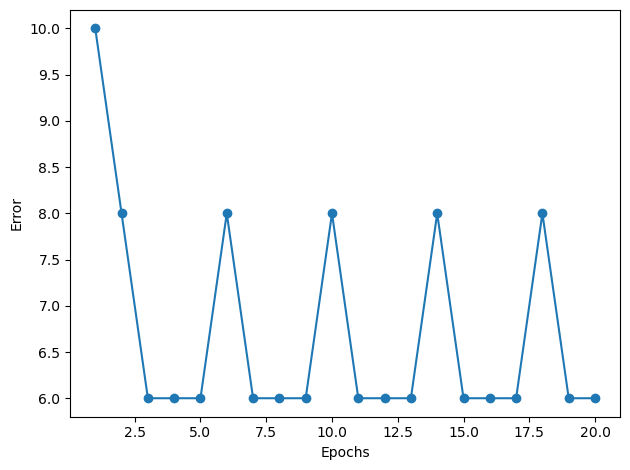

In [11]:
plt.plot(range(1, len(ppn2.errors_) + 1), ppn2.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')

plt.tight_layout()
plt.savefig('./output/fig-perceptron2_errors.png', dpi=300)
plt.show()

As we can see, the weights never stop updating. To terminate the training process, we have to set a maximum number of epochs.

## Implementing Adaline with GD

The ADAptive LInear NEuron (Adaline) is similar to the Perceptron, except that it defines a cost function based on the soft output and an optimization problem. We can therefore leverage various optimization techniques to train Adaline in a more theoretic grounded manner. Let's implement the Adaline using the batch gradient descent (GD) algorithm:

In [12]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        The seed of the pseudo random number generator.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : array-like; shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like; shape = [n_samples]
            Target values or labels.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.activation(X)
            
            # Cost function
            error = (y - output)
            cost = (error**2).sum() / 2.0
            self.cost_.append(cost)
            
            # Update rule
            self.w_[1:] += self.eta * X.T.dot(error)
            self.w_[0] += self.eta * error.sum()
            
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

As discussed in the lecture, a good learning rate $η$ is a key to the optimal convergence. In practice, it often requires some experimentation to find a good learning rate. Let's plot the cost against the number of epochs for the two different learning rates:

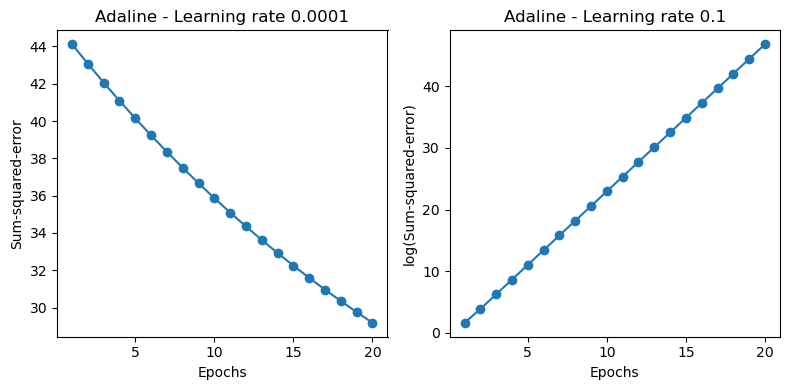

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ada1 = AdalineGD(n_iter=20, eta=0.0001).fit(X_train_std, y_train)
ax[0].plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline - Learning rate 0.0001')

ada2 = AdalineGD(n_iter=20, eta=0.1).fit(X_train_std, y_train)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.1')

plt.tight_layout()
plt.savefig('./output/fig-adaline-gd-overshoot.png', dpi=300)
plt.show()

The left figure shows what could happen if we choose a too small learning rate: although the cost decreases, the descent is too small that the algorithm would require a large number of epochs to converge. On the other hand, the right figure shows what could happen if we choose a learning rate that is too large: instead of minimizing the cost function, the error becomes larger in every epoch because we overshoot the optimal point every time. This is illustrated below:

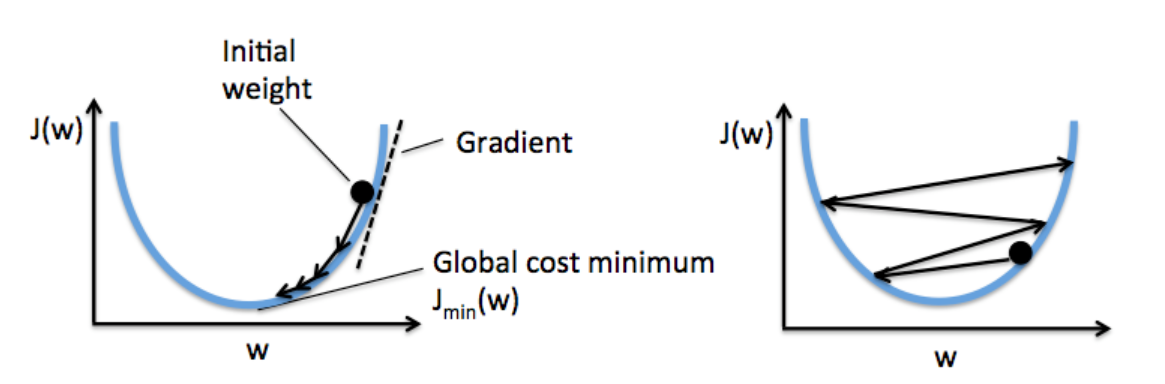

With a properly chosen learning rate $
$  , the AdalineGD converges and gives a better prediction accuracy (80%) as compared with the Perceptron (70%):

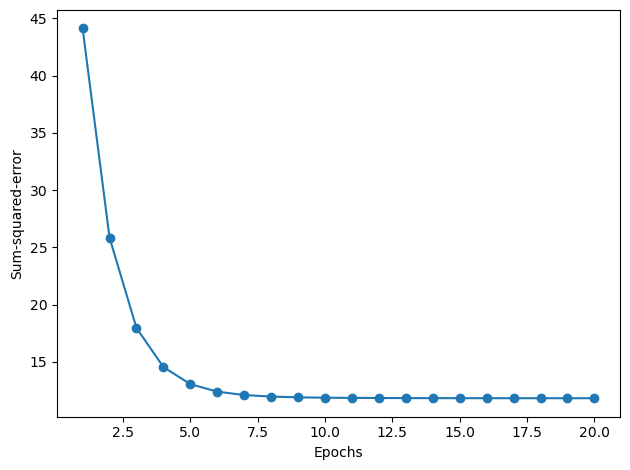

Misclassified samples: 2
Accuracy: 0.80


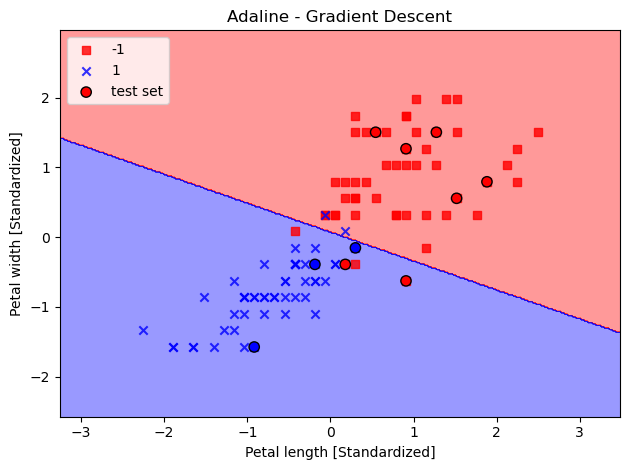

In [14]:
ada = AdalineGD(n_iter=20, eta=0.01)
ada.fit(X_train_std, y_train)

# cost values

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
plt.savefig('./output/fig-adalin-gd-cost.png', dpi=300)
plt.show()

# testing accuracy

y_pred = ada.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot decision boundary 

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=ada, test_idx=range(len(y_train),
                                                    len(y_train) + len(y_test)))
plt.title('Adaline - Gradient Descent')
plt.xlabel('Petal length [Standardized]')
plt.ylabel('Petal width [Standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('./output/fig-adaline-gd-boundary.png', dpi=300)
plt.show()

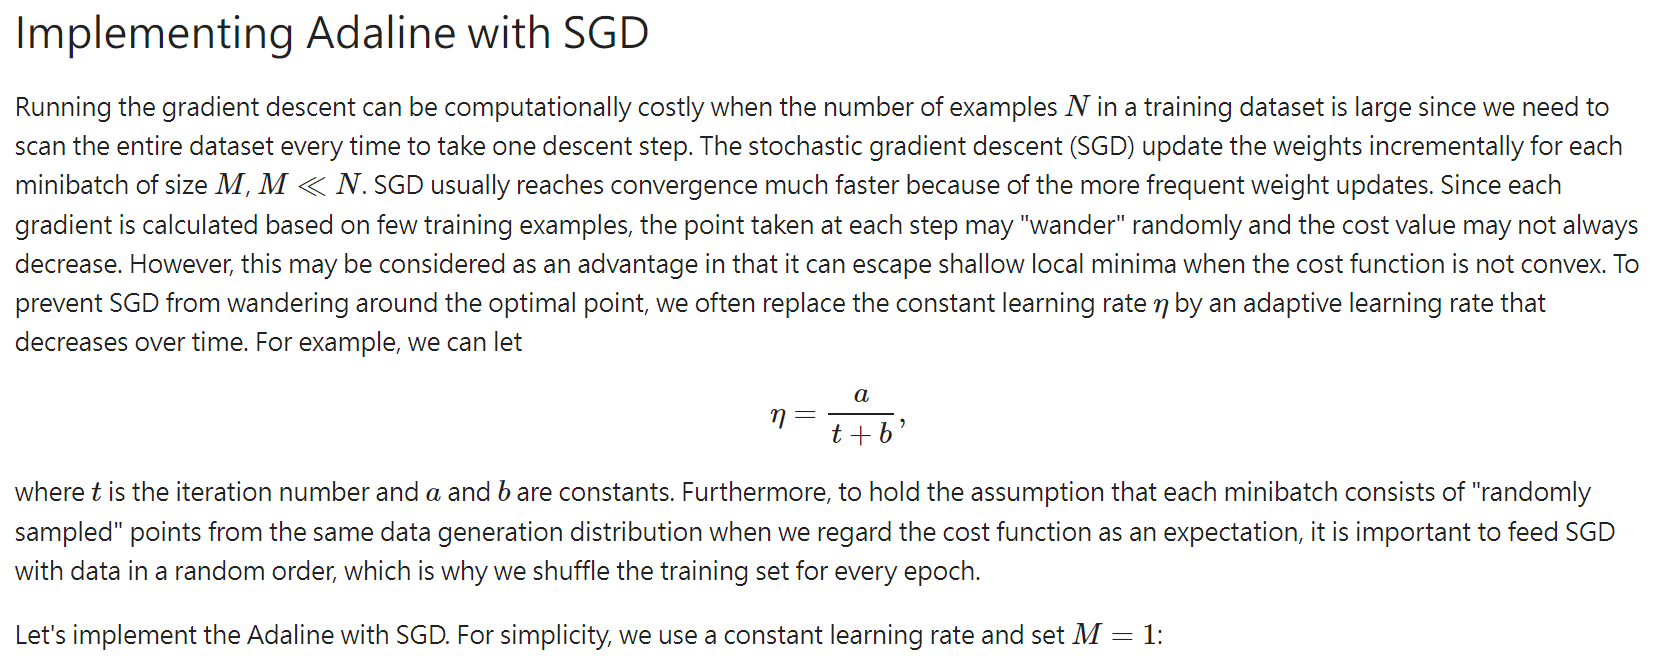

In [15]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent cycles.
    random_state : int
        Set random state for shuffling and initializing the weights.
        
    """
    def __init__(self, eta=0.01, n_iter=50,shuffle=True, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state : seed(random_state)
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : array-like; shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like; shape = [n_samples]
            Target values or labels.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, yi in zip(X, y):
                cost.append(self._update_weights(xi, yi))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Randomly initialize weights"""
        self.w_ = np.random.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, yi):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(xi)
        
        # Cost function
        error = (yi - output)
        cost = 0.5 * error**2
        
        # Update rule
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, yi in zip(X, y):
                self._update_weights(xi, yi)
        else:
            self._update_weights(X, y)
        return self

`_shuffle` 方法用於對訓練數據進行洗牌，以確保每次迭代時選擇的樣本是隨機的，避免陷入循環問題。以下是對這個方法的詳細說明：

1. `r = np.random.permutation(len(y))`：首先，生成一個隨機的排列，該排列包含從 0 到 `len(y)-1` 的整數，其中 `y` 是目標值（標籤）的長度。這個排列將用於隨機化數據。

2. `return X[r], y[r]`：然後，使用生成的隨機排列 `r` 來對訓練數據 `X` 和目標值 `y` 進行重新排序。這實際上是將數據中的樣本按照 `r` 中的順序重新排列，以確保每次迭代選擇的樣本都是隨機的。

通過執行這個洗牌操作，可以防止模型在訓練中陷入循環，確保每次迭代使用的數據都是隨機的，有助於更好地逼近最佳解決方案。這對於隨機梯度下降等優化算法非常重要，以確保模型可以在多次迭代中有效地學習。


---

We pass random_state to np.random.seed so it will be used for shuffling and initializing the weights. If we modify the activation() method so that it is identical to the predict() method, then this class degenerates into the Perceptron with shuffling.

NOTE:

Although not shown in our implementation, setting a larger minibatch size $M>1$ is advantages on modern CPU architecture as we can replace the for-loop over the training samples by vectorized operations, which is usually improve the computational efficiency. Vectorization means that an elemental arithmetic operation is automatically applied to all elements in an array. By formulating our arithmetic operations as a sequence of instructions on an array rather than performing a set of operations for each element one at a time, we can make better use of our modern CPU architectures with Single Instruction, Multiple Data (SIMD) support. Furthermore, many scientific libraries like NumPy use highly optimized linear algebra libraries, such as Basic Linear Algebra Subprograms (BLAS) and Linear Algebra Package (LAPACK) that implement vectorized operations in C or Fortran.

Let's see how Adaline performs with SGD:

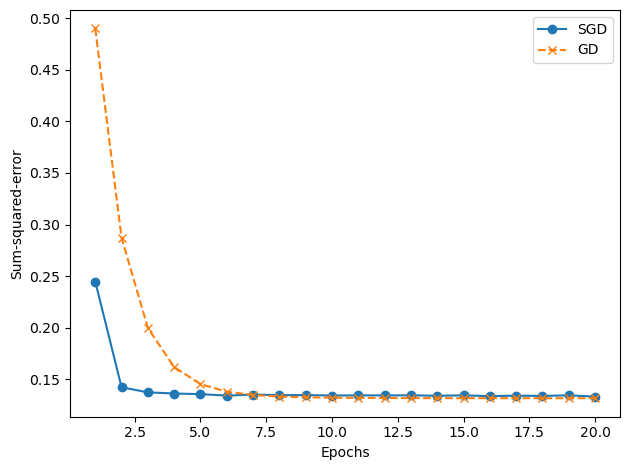

Misclassified samples: 2
Accuracy: 0.80


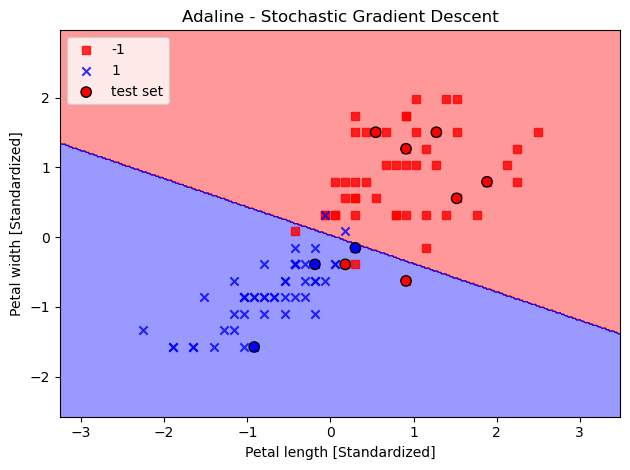

In [16]:
adas = AdalineSGD(n_iter=20, eta=0.01, random_state=1)
adas.fit(X_train_std, y_train)

# Cost values
plt.plot(range(1, len(adas.cost_) + 1), adas.cost_, 
         marker='o', label='SGD')
plt.plot(range(1, len(ada.cost_) + 1), np.array(ada.cost_) / len(y_train), 
         marker='x', linestyle='--', label='GD')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig('./output/fig-adaline-sgd-cost.png', dpi=300)
plt.show()

# Testing accuracy
y_pred = adas.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# Plot decision boundary 
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=adas, test_idx=range(len(y_train),
                                                      len(y_train) + len(y_test)))
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('Petal length [Standardized]')
plt.ylabel('Petal width [Standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('./output/fig-adaline-sgd-boundary.png', dpi=300)
plt.show()

As we can see, the cost value goes down pretty quickly, and is only sightly worse than the (normalized) cost value of the batch gradient descent after 7 epochs.

Another advantage of stochastic gradient descent is that we can use it for <font color="red">online learning</font>. In online learning, a model is trained on-the-fly as new training data arrives. This is especially useful if we are accumulating large amounts of data over time. For example, customer data in typical web applications. Using online learning, the system can immediately adapt to changes without training from the scratch. Furthermore, if storage space is an issue, we can discard the training data after updating the model. In our implementation, we provide the partial_fit() method for online learning.

## <center>Assignment</center>

Implement the Adaline with SGD which can set different batch_size ($M$) as parameter. Then, use the Iris dataset to fit your model with 3 different $M$ (including $M=1$) and fixed learning rate $η$ and print out the accuracy of each model. Last, plot the cost against the number of epochs using different $M$ in one figure.

#### Requirements:
* Submit to eeclass with your code file Lab04-1_{student_id}.ipynb and image file Lab04-1_{student_id}.png (e.g. Lab04-1_110069999.ipynb).
* The code file should only contain the Assignment part.
* You can take the model we taught in lab as reference.
* To simplfy your work, you can ignore part of data which is not divisible by M.
* Deadline: 2024-01-07 (Sun) 23:59.

#### Your code file should contain:

* Split training and testing data (test_size = 20% of the whole dataset)
* Handcrafted Adaline classifier with M as parameter.
* Fit model with 3 different M and fixed η. (including M=1)
* Print the accuracy of each model.
* Plot the cost against the number of epochs using different M in one figure.

#### Your image file should contain:

1. Figure of the cost against the number of epochs using different M.

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import display

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class label']
display(df.head())

X = df[['Petal length', 'Petal width']].values
y = pd.factorize(df['Class label'])[0]

# discard exmaples in the first class
X = X[50:150]
y = np.where(y[50:150] == 2, -1, y[50:150])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print('# Training data points: %d' % X_train.shape[0])
print('# Testing data points: %d' % X_test.shape[0])
print('Class labels: %s' % np.unique(y))

,Sepal length,Sepal width,Petal length,Petal width,Class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Training data points: 80
# Testing data points: 20
Class labels: [-1  1]


### <center>1. Construct AdalineSGD with tunable batch size</center>

In [32]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent cycles.
    random_state : int
        Set random state for shuffling and initializing the weights.
        
    """
    def __init__(self, eta=0.01, n_iter=50, batch=1,shuffle=True, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.batch = batch
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state : seed(random_state)
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : array-like; shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like; shape = [n_samples]
            Target values or labels.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for j in range(X.shape[0] // self.batch):
                begin = self.batch * j
                end = begin + self.batch
                cost.append(self._update_weights(X[begin:end], y[begin:end]))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost) # 每一個epoch產生一個cost
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Randomly initialize weights"""
        self.w_ = np.random.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, yi):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(xi)
        
        # Cost function
        error = (yi - output)
        cost = 0.5 * np.sum(error**2)
        
        # Update rule
        self.w_[1:] += self.eta * xi.T.dot(error)
        self.w_[0] += self.eta * np.sum(error)
        
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, yi in zip(X, y):
                self._update_weights(xi, yi)
        else:
            self._update_weights(X, y)
        return self

### <center>2. Evaluate AdalineSGD with different batch size</center>

In [51]:
def evaluate_adalineSGD(batch_size):
    adas = AdalineSGD(eta=0.01, n_iter=20, batch=batch_size, random_state=1)
    adas.fit(X_train_std, y_train)

    y_pred = adas.predict(X_test_std)
    print('Accuracy (batch size = %d) : %.2f' % (batch_size, accuracy_score(y_test, y_pred)))
    print('Misclassified samples: %d\n' % (y_test != y_pred).sum())
    return adas

Accuracy (batch size = 1) : 0.85
Misclassified samples: 3

Accuracy (batch size = 30) : 0.85
Misclassified samples: 3

Accuracy (batch size = 70) : 0.85
Misclassified samples: 3



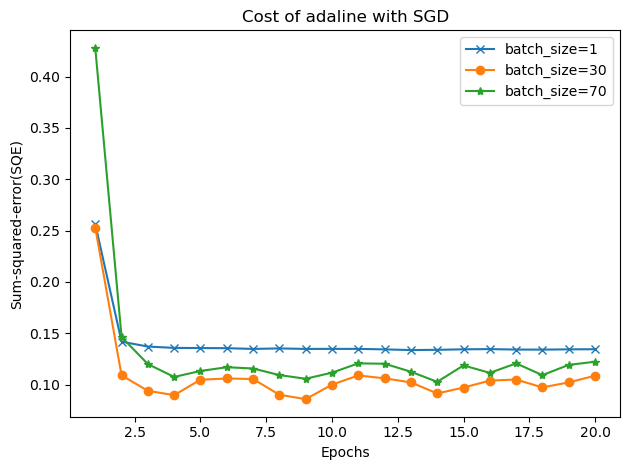

In [62]:
adas0 = evaluate_adalineSGD(batch_size=1)
adas1 = evaluate_adalineSGD(batch_size=30)
adas2 = evaluate_adalineSGD(batch_size=70)

# Cost values
plt.title('Cost of adaline with SGD')
plt.plot(range(1, len(adas0.cost_) + 1), adas0.cost_, 
         marker='x', label='batch_size=%d' % adas0.batch)
plt.plot(range(1, len(adas1.cost_) + 1), adas1.cost_, 
         marker='o', label='batch_size=%d' % adas1.batch)
plt.plot(range(1, len(adas2.cost_) + 1), adas2.cost_, 
         marker='*', label='batch_size=%d' % adas2.batch)
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error(SQE)')
plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig('./output/Lab04-1_111501528.png', dpi=300)
plt.show()